RANDOM FOREST REGRESSOR AND CLASSIFIER

In [1]:
# Load necessary libraries
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
setwd("C:/Users/User")

In [3]:
data <- read.csv("RandomForestRegressorClassifier.csv")

In [5]:
head(data)

,Product_ID,Category,Price,Discount,Customer_Rating,Sales,Sales_Category
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,P_1,Electronics,20.42,33.76,2.3,32.05,Low
2,P_2,Electronics,338.29,31.32,4.7,539.32,Medium
3,P_3,Electronics,555.83,7.44,3.9,1188.19,Medium
4,P_4,Electronics,357.68,23.12,2.8,477.37,Low
5,P_5,Furniture,686.42,21.81,2.3,603.97,Medium
6,P_6,Furniture,572.34,11.50,1.9,1195.41,Medium


In [6]:
# Load library for machine learning
library(caret)

Loading required package: lattice



In [7]:
# Encode categorical features

data$Category <- as.factor(data$Category)

data$Sales_Category <- as.factor(data$Sales_Category)

In [8]:
set.seed(42)
train_index <- createDataPartition(data$Sales, p = 0.8, list = FALSE)
train_data <- data[train_index, ]
test_data <- data[-train_index, ]

Random Forest Regressor

In [9]:
# Load random forest library
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine




In [10]:
# Train Random Forest Regressor
set.seed(42)
rf_reg <- randomForest(Sales ~ Category + Price + Discount + Customer_Rating, data = train_data)

In [11]:
# Predict on test data
pred_sales <- predict(rf_reg, test_data)

In [12]:
# Evaluate performance
rmse <- sqrt(mean((test_data$Sales - pred_sales)^2))
cat("Regression RMSE:", rmse, "\n")

Regression RMSE: 266.5489 


USE RANDOMIZED SEARCH

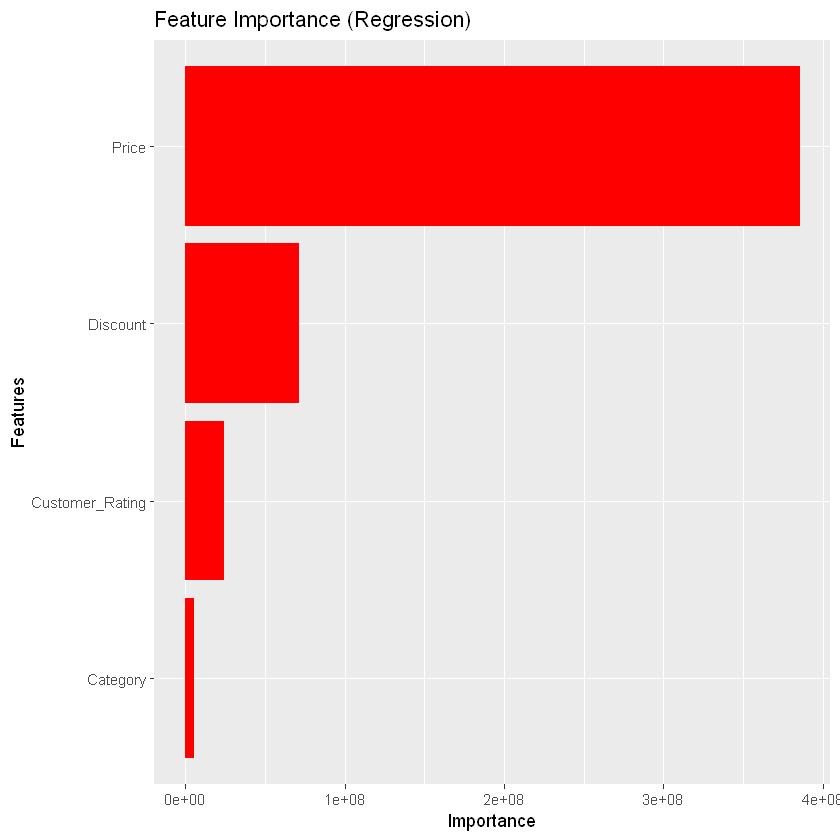

In [13]:
# Plot feature importance
importance <- as.data.frame(importance(rf_reg))
importance$Feature <- rownames(importance)
ggplot(importance, aes(x = reorder(Feature, IncNodePurity), y = IncNodePurity)) +
  geom_bar(stat = "identity", fill = "red") +
  coord_flip() +
  labs(title = "Feature Importance (Regression)", x = "Features", y = "Importance")

In [ ]:
#####################Random Forest Classifier############################################

In [14]:
# Train Random Forest Classifier
set.seed(42)
rf_clf <- randomForest(Sales_Category ~ 
                         Category + Price + Discount + Customer_Rating, data = train_data)

In [15]:
# Predict on test data
pred_category <- predict(rf_clf, test_data)

In [16]:
# Evaluate performance
conf_matrix <- confusionMatrix(pred_category, test_data$Sales_Category)
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction High Low Medium
    High     19   0     22
    Low       0 227     33
    Medium   33  41    333

Overall Statistics
                                          
               Accuracy : 0.8178          
                 95% CI : (0.7874, 0.8456)
    No Information Rate : 0.548           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6636          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: High Class: Low Class: Medium
Sensitivity              0.36538     0.8470        0.8582
Specificity              0.96646     0.9250        0.7688
Pos Pred Value           0.46341     0.8731        0.8182
Neg Pred Value           0.95052     0.9085        0.8173
Prevalence               0.07345     0.3785        0.5480
Detection Rate           0.02684     0.3206        0.4703
Det

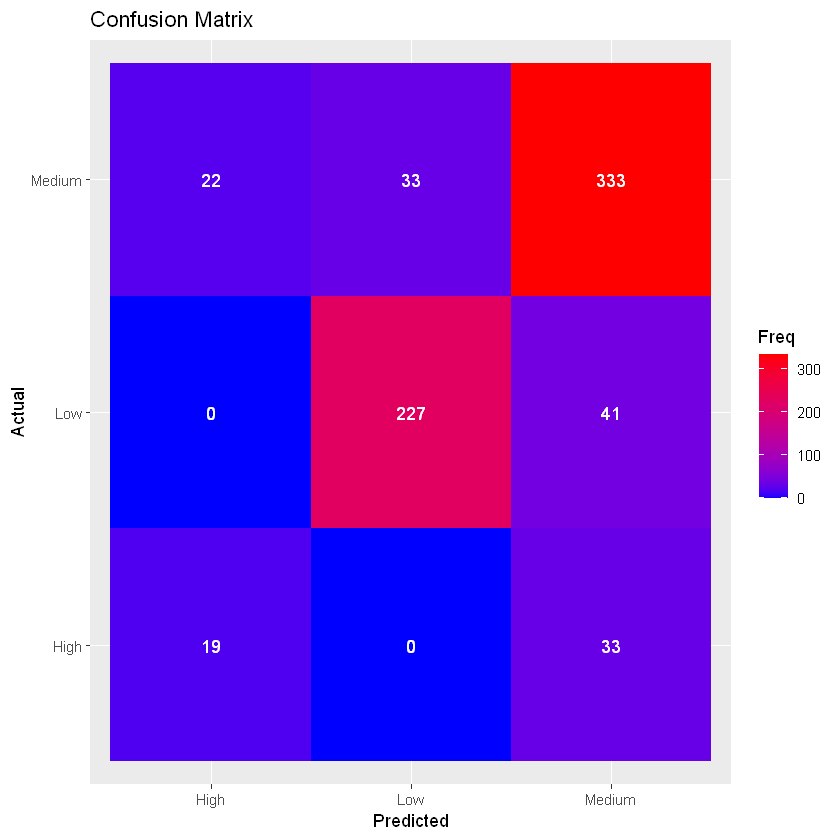

In [17]:
# Visualize Confusion Matrix
conf_mat <- as.data.frame(conf_matrix$table)
ggplot(conf_mat, aes(Prediction, Reference, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "white") +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Confusion Matrix", x = "Predicted", y = "Actual")

In [ ]:
#################Visualizations##########################################

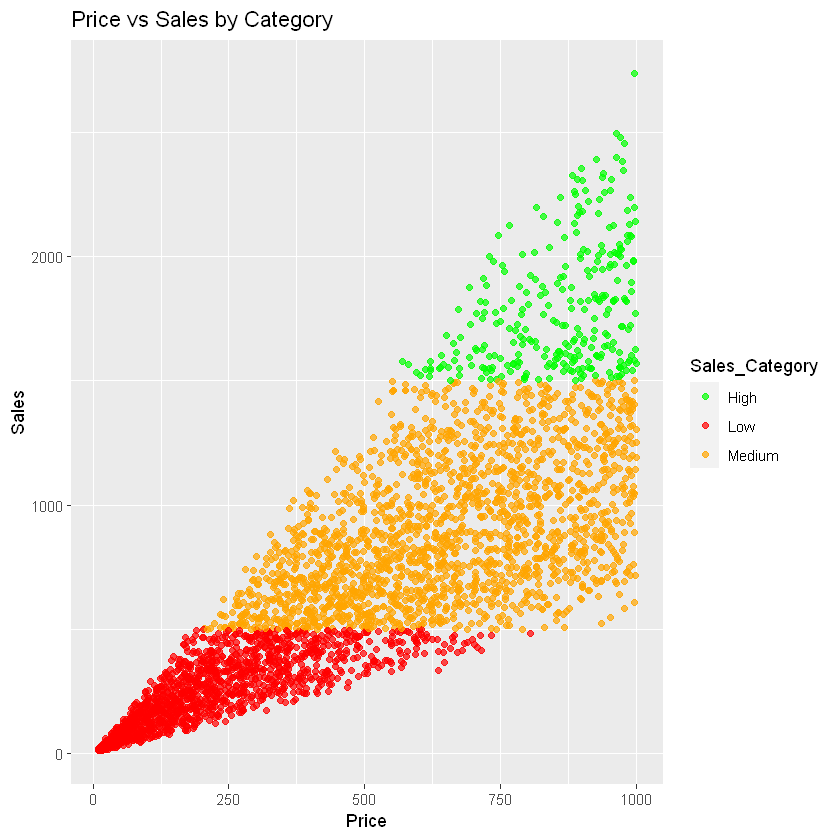

In [18]:
# Scatter plot of Price vs Sales
ggplot(data, aes(x = Price, y = Sales, color = Sales_Category)) +
  geom_point(alpha = 0.7) +
  scale_color_manual(values = c("Low" = "red", "Medium" = "orange", "High" = "green")) +
  labs(title = "Price vs Sales by Category", x = "Price", y = "Sales")

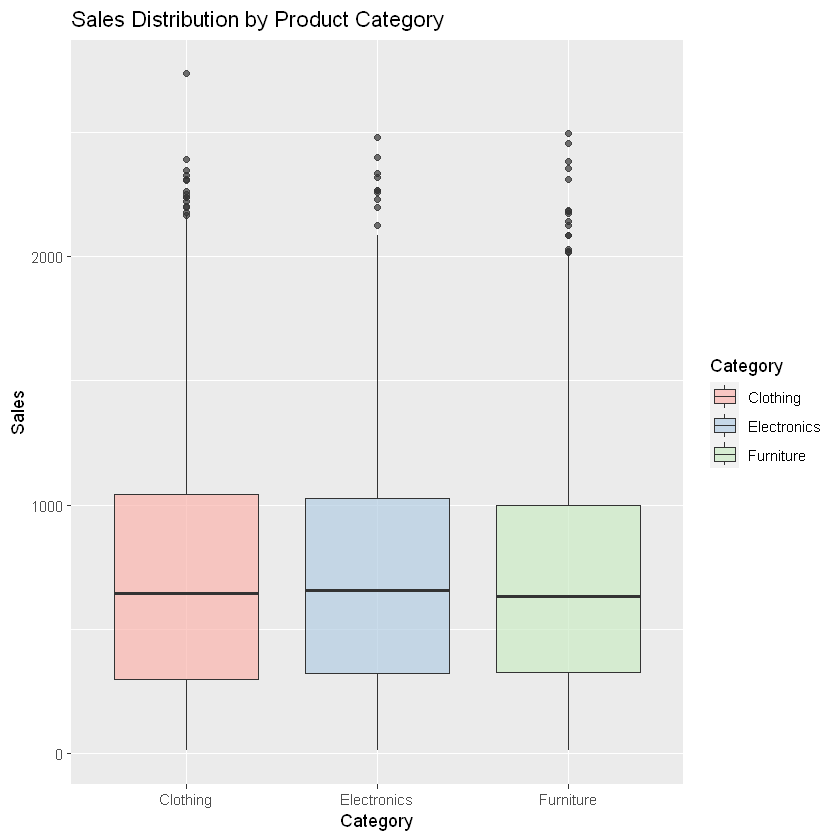

In [19]:
# Boxplot of Sales by Category
ggplot(data, aes(x = Category, y = Sales, fill = Category)) +
  geom_boxplot(alpha = 0.7) +
  scale_fill_brewer(palette = "Pastel1") +
  labs(title = "Sales Distribution by Product Category", x = "Category", y = "Sales")

In [20]:
##############SAVING THE MODEL FOR FUTURE USE############################################
# Save models for future use
saveRDS(rf_reg, "rf_regressor_model.rds")
saveRDS(rf_clf, "rf_classifier_model.rds")